# **주택 가격 예측 : 회귀 문제**
---
- 연속적인 값을 예측하는 회귀(regression) 문제
- 1970년대 중반 보스턴 외곽 지역의 범죄율, 지방세율 등의 데이터가 주어졌을 때 주택 가격의 중간 값 예측

##보스턴 주택 가격 데이터셋
- 506개의 데이터(404개의 훈련 샘플, 102개의 테스트 샘플)
- 입력 데이터의 각 특성(e.g. 범죄율)은 스케일이 서로 다름
- 예컨대, 입력 데이터의 1번 특성은 0과 1 사이의 비율을 나타낸다면, 2번 특성은 1과 12사이의 값을 가지는 등
- 각 데이터는 13개의 특성 value를 가지고 있음

In [1]:
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

65536/57026 [==================================] - 0s 0us/step


In [2]:
train_data.shape

(404, 13)

In [3]:
test_data.shape

(102, 13)

타깃은 주택의 중간 가격으로 천다러 단위

In [4]:
print(len(train_targets))
print(train_targets)

404
[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4 12.1 17.9 23.1 19.9
 15.7  8.8 50.  22.5 24.1 27.5 10.9 30.8 32.9 24.  18.5 13.3 22.9 34.7
 16.6 17.5 22.3 16.1 14.9 23.1 34.9 25.  13.9 13.1 20.4 20.  15.2 24.7
 22.2 16.7 12.7 15.6 18.4 21.  30.1 15.1 18.7  9.6 31.5 24.8 19.1 22.
 14.5 11.  32.  29.4 20.3 24.4 14.6 19.5 14.1 14.3 15.6 10.5  6.3 19.3
 19.3 13.4 36.4 17.8 13.5 16.5  8.3 14.3 16.  13.4 28.6 43.5 20.2 22.
 23.  20.7 12.5 48.5 14.6 13.4 23.7 50.  21.7 39.8 38.7 22.2 34.9 22.5
 31.1 28.7 46.  41.7 21.  26.6 15.  24.4 13.3 21.2 11.7 21.7 19.4 50.
 22.8 19.7 24.7 36.2 14.2 18.9 18.3 20.6 24.6 18.2  8.7 44.  10.4 13.2
 21.2 37.  30.7 22.9 20.  19.3 31.7 32.  23.1 18.8 10.9 50.  19.6  5.
 14.4 19.8 13.8 19.6 23.9 24.5 25.  19.9 17.2 24.6 13.5 26.6 21.4 11.9
 22.6 19.6  8.5 23.7 23.1 22.4 20.5 23.6 18.4 35.2 23.1 27.9 20.6 23.7
 28.  13.6 27.1 23.6 20.6 18.2 21.7 17.1  8.4 25.3 13.8 22.2 18.4 20.7
 31.6 30.5 20.3  8.8 19.2 19.4 23.1 23.  14.8 48.8 22.6 33.4 21.1 13.6
 32.2 

##데이터 준비
- 상이한 스케일을 가진 값을 신경망에 주입하면 문제가 됨
- 네트워크가 자동으로 맞추려고 할 순 있지만 이는 학습을 더 어렵게 만듬
- 이러한 데이터를 다룰 땐 특성별로 정규화를 해야 함
- **입력 데이터의 각 특성에 대해 해당 특성의 평균을 빼고 표준 편차로 나누어 주기**
- 이는 특성값의 중앙이 0 근처에 맞춰지고, 표준 편차가 1이 되도록 함.
- 넘파이를 사용하면 간단히 구현 가능

In [5]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

- 테스트 데이터를 정규화할 때 사용한 값이 훈련 데이터에서 계산한 값임을 주목!
- **머신 러닝 작업에선 절대로 테스트 데이터에서 계산한 어떤 값도 사용해선 안됨.(데이터 정규화 조차도)**

##모델 구성
- 샘플의 갯수가 적어 64개의 유닛을 가진 두 개의 은닉층으로 구성
- **훈련 데이터가 적을수록 과적합이 쉽게 일어나므로 작은 모델을 사용하는 것이 효율적**

In [6]:
from keras import models, layers

def build_model():
  # 동일한 모델 여러 번 생성할 것이므로 함수로 만들어 사용
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

- 이 네트워크의 마지막 층은 하나의 유닛, 활성화 함수 없음
- 이는 전형적인 스칼라 회귀를 위한 구성
- 여기선 마지막 층이 순수한 선형이므로 네트워크가 어떤 범위의 값이라도 자유롭게 예측하도록 학습됨(sigmoid를 사용하면 0과 1 사이의 값을 예측하는 것과 비교)
</br></br>
- 이 모델은 **mse** 손실 함수를 사용 : 평균제곱오차(mean squared error)의 약자로 예측과 타깃 사이 거리의 제곱을 측정
- 회귀 문제에서 널리 사용되는 손실 함수
</br></br>
- 훈련 동안 모니터링을 위해 새로운 지표인 **평균절대오차** 측정
- 이는 예측과 타깃 사이 거리의 절댓값
- 예컨대, 이 예제에서 MAE=0.5면 예측이 평균적으로 500$ 정도 차이가 난다는 의미

##K-fold cross validation을 사용한 훈련 검증
- **하이퍼 파라미터를 조정하면서 최적값을 찾기 위해** 데이터를 훈련 세트와 검증 세트로 나눔
- 데이터가 많지 않아 검증 세트도 매우 작아짐(약 100개)
- 결국 검증 세트와 훈련 세트로 어떤 데이터가 선택되었는지에 따라 검증 점수가 크게 달라짐
- 이런 경우 모델 검증 결과의 신뢰도가 낮아짐
</br></br>
- 이런 상황에서 가장 좋은 방법은 **k-fold cross validation**
- 데이터를 k개의 폴드(분할)로 나누고(일반적으로 k=4,5) k개의 모델을 각각 만들어 k-1개의 폴드에서 훈련하고 나머지 폴드에서 평가하는 방법
- 모델의 검증 점수는 k개의 검증 점수의 평균이 됨

In [7]:
import numpy as np

k = 4
num_val_samples = len(train_data)//k
num_epochs = 100
all_scores = []
for i in range(k):
  print('처리 중인 폴드 #', i)
  # 검증 데이터 준비: k번째 분할
  val_data = train_data[i*num_val_samples: (i+1)*num_val_samples]
  val_targets = train_targets[i*num_val_samples:(i+1)*num_val_samples]
  # 훈련 데이터 준비: 다른 분할 전체
  partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
  partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
  # 케라스 모델 구성(컴파일 포함)
  model = build_model()
  # 모델 훈련(verbose=0 옵션은 훈련 과정이 출력되지 않음)
  model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
  # 검증 세트로 모델 평가
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores.append(val_mae)

처리 중인 폴드 # 0
처리 중인 폴드 # 1
처리 중인 폴드 # 2
처리 중인 폴드 # 3


In [8]:
all_scores

[2.0828895568847656, 3.0702121257781982, 2.497861385345459, 2.3680670261383057]

In [9]:
np.mean(all_scores)

2.504757523536682

- 검증 세트가 다르므로 검증 점수가 2.2~2.6으로 변화가 큼
- 평균값 2.5가 각 점수보다 신뢰할만함(k-fold cross validation의 핵심)
</br></br>
- 신경망을 더 오래 500 에폭 동안 훈련해 보자!
- 각 에폭마다 모델이 얼마나 개선되는지 기록하기 위해 에폭의 검증 점수를 로그에 저장

In [10]:
from keras import backend as K
#메모리 해제, keras가 모든 설정이 초기화된 상태로 다시 시작
K.clear_session()

In [11]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('처리중인 폴드 #', i)
    # 검증 데이터 준비: k번째 분할
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # 훈련 데이터 준비: 다른 분할 전체
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # 케라스 모델 구성(컴파일 포함)
    model = build_model()
    # 모델 훈련(verbose=0 이므로 훈련 과정이 출력되지 않습니다)
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mae']  # 책과의 케라스 버전차이로 val_mean_absolute_error -> val_mae
    all_mae_histories.append(mae_history)

처리중인 폴드 # 0
처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3


In [12]:
print(len(all_mae_histories), len(all_mae_histories[0]))

4 500


그 다음 모든 폴드에 대해 에폭의 MAE 점수의 평균을 계산

In [13]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

그래프로 그려보자

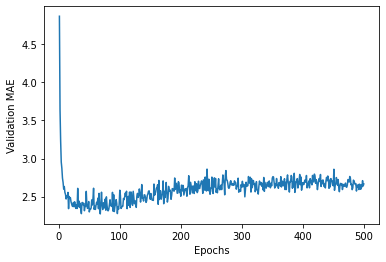

In [14]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history)+1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

위 그래프는 범위가 크고 변동이 심해 보기가 어려움. 다음과 같이 변형해보자!
- 곡선의 다른 부분과 스케일이 많이 다른 첫 10개 데이터를 제외시킴
- 부드러운 곡선을 얻기 위해 각 포인트를 이전 포인트의 지수 이동 평균으로 대체

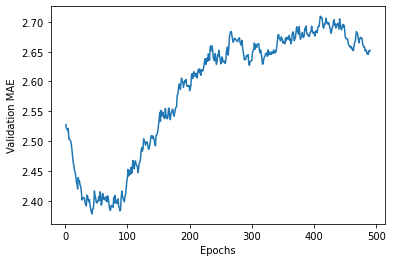

In [15]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

위 그래프에서 검증 MAE가 80번째 에폭 이후 줄어드는 것이 멈춤. 즉, 이 지점 이후로 과대적합이 시작됨  
모델의 다른 매개변수 튜닝이 끝나면 모든 훈련 데이터를 사용하고 최상의 매개변수로 최종 실전에 투입될 모델을 훈련시키고 테스트 데이터로 성능 확인

In [16]:
# 새롭게 컴파일된 모델을 얻음
model = build_model()
# 전체 데이터로 훈련
model.fit(train_data, train_targets, epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 4ms/step - loss: 16.8201 - mae: 2.5778


In [17]:
test_mae_score

2.5777647495269775

아직까지 약 2,598$ 정도의 차이가 있음

##내용 정리
- 회귀는 분류와는 다른 손실 함수 사용. **평균 제곱 오차(MSE)**는 회귀에서 자주 사용되는 손실 함수
- 회귀에서 사용되는 평가 지표는 분류와 다름. 정확도 개념은 적용되지 않음. 일반적으로 회귀 지표는 **평균 절대 오차(MAE)**
- 입력 데이터의 특성이 서로 다른 범위를 가지면 전처리 단계에서 각 특성을 **개별적으로 스케일 조정**해야 함
- 가용한 데이터가 적다면 **k-fold cross validation**을 사용하는 것이 신뢰성 있는 검증 방법임
- 가용한 훈련 데이터가 적다면 과적합을 방지하기 위해 **은닉층의 수를 줄인 모델**이 좋다(일반적으로 1개 또는 2개)

##개선
1. activation relu->selu
2. optimizer rmsprop->adam
3. 가중치 초기화 He 초깃값 사용
4. 가중치 초기화 Xavier 초깃값 사용
4. epoch 80->40
5. hidden unit 64->128
6. layer 추가 2개->3개
6. batch normalization
9. dropout
10. layer 감소 2개->1개
11. hidden unit 64->32
9. cumstom model(종합)

In [18]:
original_test_mae_score = 2.578

##개선 1. 활성화 함수 relu -> selu

In [68]:
#메모리 해제, keras가 모든 설정이 초기화된 상태로 다시 시작
K.clear_session()

def build_model():
  # 동일한 모델 여러 번 생성할 것이므로 함수로 만들어 사용
  model = models.Sequential()
  model.add(layers.Dense(64, activation='selu', input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(64, activation='selu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

# 새롭게 컴파일된 모델을 얻음
model = build_model()

# 전체 데이터로 훈련
model.fit(train_data, train_targets, epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

print("original test mae score :", original_test_mae_score)
print("test mae score :", round(test_mae_score, 3))

4/4 [==============================] - 0s 4ms/step - loss: 13.2332 - mae: 2.4440
original test mae score : 2.578
test mae score : 2.444


##개선 2. optimizer rmsprop -> adam

In [69]:
#메모리 해제, keras가 모든 설정이 초기화된 상태로 다시 시작
K.clear_session()

def build_model():
  # 동일한 모델 여러 번 생성할 것이므로 함수로 만들어 사용
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='adam', loss='mse', metrics=['mae'])
  return model

# 새롭게 컴파일된 모델을 얻음
model = build_model()

# 전체 데이터로 훈련
model.fit(train_data, train_targets, epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

print("original test mae score :", original_test_mae_score)
print("test mae score :", round(test_mae_score, 3))

4/4 [==============================] - 0s 4ms/step - loss: 17.4211 - mae: 2.6562
original test mae score : 2.578
test mae score : 2.656


##개선 3. He initializer 사용

In [70]:
#메모리 해제, keras가 모든 설정이 초기화된 상태로 다시 시작
K.clear_session()

def build_model():
  # 동일한 모델 여러 번 생성할 것이므로 함수로 만들어 사용
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu', kernel_initializer='he_normal', input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

# 새롭게 컴파일된 모델을 얻음
model = build_model()

# 전체 데이터로 훈련
model.fit(train_data, train_targets, epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

print("original test mae score :", original_test_mae_score)
print("test mae score :", round(test_mae_score, 3))

4/4 [==============================] - 0s 4ms/step - loss: 19.0408 - mae: 2.6537
original test mae score : 2.578
test mae score : 2.654


##개선 4. Xavier initializer 사용

In [71]:
#메모리 해제, keras가 모든 설정이 초기화된 상태로 다시 시작
K.clear_session()

def build_model():
  # 동일한 모델 여러 번 생성할 것이므로 함수로 만들어 사용
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu', kernel_initializer='glorot_normal', input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

# 새롭게 컴파일된 모델을 얻음
model = build_model()

# 전체 데이터로 훈련
model.fit(train_data, train_targets, epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

print("original test mae score :", original_test_mae_score)
print("test mae score :", round(test_mae_score, 3))

4/4 [==============================] - 0s 4ms/step - loss: 19.0897 - mae: 2.7691
original test mae score : 2.578
test mae score : 2.769


##개선 5. 에폭 80 -> 40

In [72]:
#메모리 해제, keras가 모든 설정이 초기화된 상태로 다시 시작
K.clear_session()

def build_model():
  # 동일한 모델 여러 번 생성할 것이므로 함수로 만들어 사용
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

# 새롭게 컴파일된 모델을 얻음
model = build_model()

# 전체 데이터로 훈련
model.fit(train_data, train_targets, epochs=40, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

print("original test mae score :", original_test_mae_score)
print("test mae score :", round(test_mae_score, 3))

4/4 [==============================] - 0s 5ms/step - loss: 22.5996 - mae: 3.0408
original test mae score : 2.578
test mae score : 3.041


##개선 6. hidden unit 64 -> 128

In [73]:
#메모리 해제, keras가 모든 설정이 초기화된 상태로 다시 시작
K.clear_session()

def build_model():
  # 동일한 모델 여러 번 생성할 것이므로 함수로 만들어 사용
  model = models.Sequential()
  model.add(layers.Dense(128, activation='relu', input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

# 새롭게 컴파일된 모델을 얻음
model = build_model()

# 전체 데이터로 훈련
model.fit(train_data, train_targets, epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

print("original test mae score :", original_test_mae_score)
print("test mae score :", round(test_mae_score, 3))

4/4 [==============================] - 0s 4ms/step - loss: 16.7353 - mae: 2.7848
original test mae score : 2.578
test mae score : 2.785


##개선 7. hidden layer 1개 추가

In [74]:
#메모리 해제, keras가 모든 설정이 초기화된 상태로 다시 시작
K.clear_session()

def build_model():
  # 동일한 모델 여러 번 생성할 것이므로 함수로 만들어 사용
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

# 새롭게 컴파일된 모델을 얻음
model = build_model()

# 전체 데이터로 훈련
model.fit(train_data, train_targets, epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

print("original test mae score :", original_test_mae_score)
print("test mae score :", round(test_mae_score, 3))

4/4 [==============================] - 0s 5ms/step - loss: 14.5216 - mae: 2.4868
original test mae score : 2.578
test mae score : 2.487


##개선 8. Batch Normalization

In [75]:
#메모리 해제, keras가 모든 설정이 초기화된 상태로 다시 시작
K.clear_session()

def build_model():
  # 동일한 모델 여러 번 생성할 것이므로 함수로 만들어 사용
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
  model.add(layers.BatchNormalization())
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

# 새롭게 컴파일된 모델을 얻음
model = build_model()

# 전체 데이터로 훈련
model.fit(train_data, train_targets, epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

print("original test mae score :", original_test_mae_score)
print("test mae score :", round(test_mae_score, 3))

4/4 [==============================] - 0s 5ms/step - loss: 17.1125 - mae: 2.5411
original test mae score : 2.578
test mae score : 2.541


##개선 9. Dropout

In [77]:
#메모리 해제, keras가 모든 설정이 초기화된 상태로 다시 시작
K.clear_session()

def build_model():
  # 동일한 모델 여러 번 생성할 것이므로 함수로 만들어 사용
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
  model.add(layers.Dropout(0.1))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dropout(0.1))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

# 새롭게 컴파일된 모델을 얻음
model = build_model()

# 전체 데이터로 훈련
model.fit(train_data, train_targets, epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

print("original test mae score :", original_test_mae_score)
print("test mae score :", round(test_mae_score, 3))

4/4 [==============================] - 0s 5ms/step - loss: 18.8293 - mae: 2.6439
original test mae score : 2.578
test mae score : 2.644


##개선 10. 은닉층 수 감소(2층->1층)

In [78]:
#메모리 해제, keras가 모든 설정이 초기화된 상태로 다시 시작
K.clear_session()

def build_model():
  # 동일한 모델 여러 번 생성할 것이므로 함수로 만들어 사용
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

# 새롭게 컴파일된 모델을 얻음
model = build_model()

# 전체 데이터로 훈련
model.fit(train_data, train_targets, epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

print("original test mae score :", original_test_mae_score)
print("test mae score :", round(test_mae_score, 3))

4/4 [==============================] - 0s 4ms/step - loss: 20.5311 - mae: 2.9633
original test mae score : 2.578
test mae score : 2.963


##개선 11. 은닉 유닛 수 감소(64개->32개)

In [79]:
#메모리 해제, keras가 모든 설정이 초기화된 상태로 다시 시작
K.clear_session()

def build_model():
  # 동일한 모델 여러 번 생성할 것이므로 함수로 만들어 사용
  model = models.Sequential()
  model.add(layers.Dense(32, activation='relu', input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(32, activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

# 새롭게 컴파일된 모델을 얻음
model = build_model()

# 전체 데이터로 훈련
model.fit(train_data, train_targets, epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

print("original test mae score :", original_test_mae_score)
print("test mae score :", round(test_mae_score, 3))

4/4 [==============================] - 0s 4ms/step - loss: 20.1558 - mae: 2.7450
original test mae score : 2.578
test mae score : 2.745


##개선 12. Custom model(종합)
- layer 추가(2층->3층)
- 배치정규화

In [85]:
#메모리 해제, keras가 모든 설정이 초기화된 상태로 다시 시작
K.clear_session()

def build_model():
  # 동일한 모델 여러 번 생성할 것이므로 함수로 만들어 사용
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
  model.add(layers.BatchNormalization())
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

# 새롭게 컴파일된 모델을 얻음
model = build_model()

# 전체 데이터로 훈련
model.fit(train_data, train_targets, epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

print("original test mae score :", original_test_mae_score)
print("test mae score :", round(test_mae_score, 3))

4/4 [==============================] - 0s 4ms/step - loss: 12.1671 - mae: 2.3726
original test mae score : 2.578
test mae score : 2.373


## 결론
- original test mae score = 2.578
- **minimum test mae score = `2.373`**
- 해당 모델은 **hidden layer 추가**와 **배치정규화**의 개선사항을 추가하였다.
- 약 0.2 즉, 200달러 정도 실제 정답에 더 가까운 값을 도출해내었다.